In [1]:
import numpy as np
import pandas as pd

from tclp.clause_recommender import utils
from tqdm import tqdm 
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [2]:
model_path = "../CC_BERT/CC_model"
embeddings_dir = "../CC_BERT/CC_embeddings"
clause_folder = "../data/cleaned_content"
clause_html = '../data/clause_boxes'

In [3]:
tokenizer, model, names, docs, final_df = utils.getting_started(model_path, clause_folder, clause_html)

/Users/georgia/Library/Caches/pypoetry/virtualenvs/tclp-iQ_dTQ3E-py3.10/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of RobertaModel were not initialized from the model checkpoint at ../CC_BERT/CC_model and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Playing around with multilabel tagging

In [4]:
clause_tags = pd.read_excel("../data/clause_tags.xlsx")

In [7]:
final_df

,Name,Title,Excerpt,Jurisdiction,Updated,URL,Matched Filename,Document
0,Griff's Clause,Template Board Paper for Significant Contracts...,Template board papers with detailed prompts fo...,England & Wales,2024-09-10 10:34:38,https://chancerylaneproject.org/clauses/templa...,Template_Board_Paper_for_Significant_Contracts...,1. Strategy implications Alignment 1.1 The pro...
1,Bella's Clause,Management Equity Ratchet Terms,A template clause for inclusion in investment ...,England & Wales,2024-09-10 10:41:23,https://chancerylaneproject.org/clauses/manage...,Management_Equity_Ratchet_Terms.txt,1. Conversion Rights 1.1(see Definitions)1.2 T...
2,Chloe's Clause,Environmental Business Charter,The Environmental Business Charter – a “soft t...,England & Wales,2024-09-10 10:41:31,https://chancerylaneproject.org/clauses/enviro...,Environmental_Business_Charter.txt,1. Join the[Net Zero Lawyer’s Alliance / the L...
3,Matthew's Clause,Late Payment – Green Interest Remedies,Creative interest rate remedies by which payme...,England & Wales,2024-09-10 10:43:45,https://chancerylaneproject.org/clauses/late-p...,Late_Payment_–_Green_Interest_Remedies.txt,1. If[Party 2]fails to make a payment due to[P...
4,Soren's Clause,Land: Sustainable Soil Management,A set of sustainable soil management obligatio...,England & Wales,2024-10-02 14:16:08,https://chancerylaneproject.org/clauses/land-s...,Land__Sustainable_Soil_Management.txt,(A)[Consider including Eddie’s Recitals(Climat...
...,...,...,...,...,...,...,...,...
117,Emilia's Protocols,Green Litigation and Arbitration Protocols,Two similar protocols (litigation and arbitrat...,England & Wales,2024-09-10 10:42:57,https://chancerylaneproject.org/clauses/green-...,Green_Litigation_and_Arbitration_Protocols.txt,<p>hello</p>\n\n1. The parties[have signed up ...
118,Mary's Clause,JCT Energy Efficiency and Environmental Obliga...,This clause amends the JCT’s standard Design a...,England & Wales,2024-09-10 10:39:02,https://chancerylaneproject.org/clauses/jct-en...,JCT_Energy_Efficiency_and_Environmental_Obliga...,1. to use sustainable materials and avoid the ...
119,Emilio's Checklist,Climate Policy Footprint,A checklist that requests one-off or repeated ...,England & Wales,2024-09-10 10:36:13,https://chancerylaneproject.org/clauses/climat...,Climate_Policy_Footprint.txt,1.1 Details of the Company’s climate policy en...
120,Luna's Clause,Net Zero Aligned Construction Modifications,A clause that incentivises building contractor...,England & Wales,2024-09-10 10:39:28,https://chancerylaneproject.org/clauses/net-ze...,Net_Zero_Aligned_Construction_Modifications.txt,1. Contractor’s Net Zero obligations The Contr...


In [8]:
clause_tags = utils.prepare_clause_tags(clause_tags, final_df)

Fuzzy match: 'ESG-Based Performance Conditions for Employee Incentive Awards' matched to 'environmental_social_and_governance_esg_based_performance_conditions_for_employee_incentive_awards'
Fuzzy match: 'MMC and Net Zero Provisions for Construction or Development Agreements' matched to 'modern_methods_of_construction_mmc_and_net_zero_provisions_for_construction_or_development_agreements'
Fuzzy match: 'Net Zero Obligations in FIDIC EPC Contracts' matched to 'net_zero_obligations_in_fidic_engineering_procurement_and_construction_epc_contracts'
Fuzzy match: 'Sustainability KPIs in Construction Works Task Orders' matched to 'sustainability_key_performance_indicators_in_construction_works_task_orders'


In [9]:
texts = clause_tags['CombinedText'].tolist()
embeddings = np.vstack([
    utils.encode_text(text, tokenizer, model, method='cls') for text in tqdm(texts)
])

100%|██████████| 122/122 [00:14<00:00,  8.59it/s]


In [ ]:
#save embeddings to file


In [10]:
reducer = umap.UMAP(random_state=42)
embedding_2d = reducer.fit_transform(embeddings)


/Users/georgia/Library/Caches/pypoetry/virtualenvs/tclp-iQ_dTQ3E-py3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


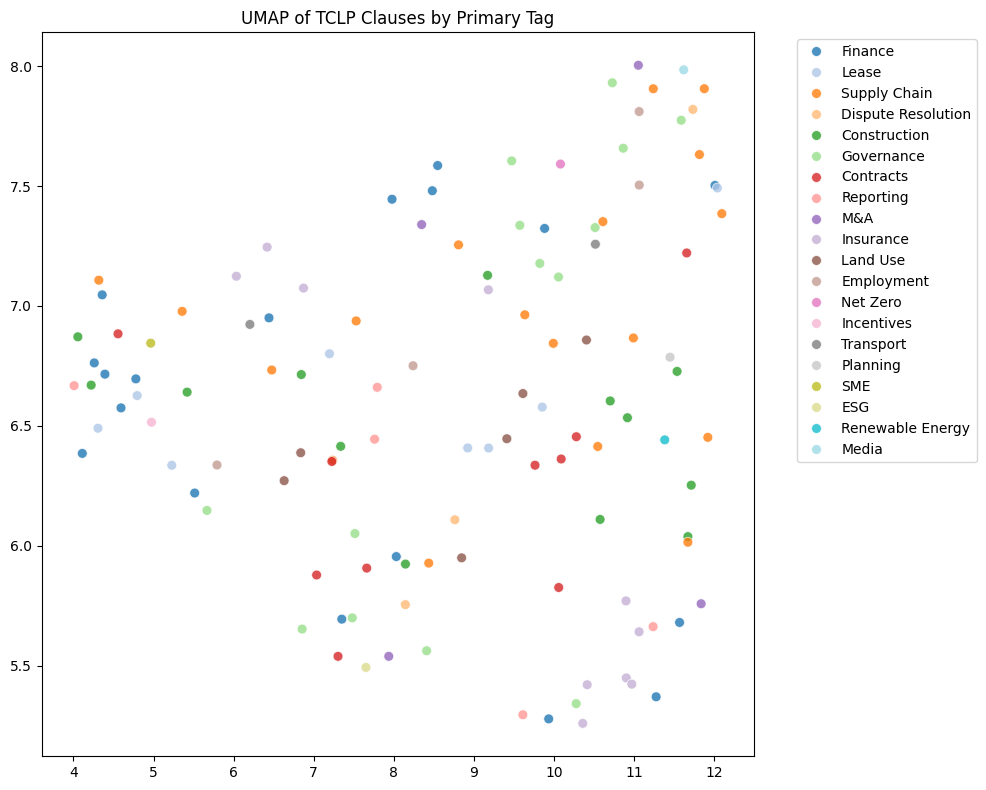

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=embedding_2d[:, 0],
    y=embedding_2d[:, 1],
    hue=clause_tags['PrimaryTag'],
    palette='tab20',
    s=50,
    alpha=0.8
)
plt.title("UMAP of TCLP Clauses by Primary Tag")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
import plotly.express as px

fig = px.scatter(
    x=embedding_2d[:, 0],
    y=embedding_2d[:, 1],
    color=clause_tags['PrimaryTag'],
    hover_data={
        "Clause": clause_tags['Clause'],
        "Tags": clause_tags['Tag'],
    },
    title="TCLP Clauses by UMAP Embedding"
)
fig.show()


In [17]:
tag_matrix = utils.multi_label_jacccard(clause_tags)

/Users/georgia/Library/Caches/pypoetry/virtualenvs/tclp-iQ_dTQ3E-py3.10/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning:

Data was converted to boolean for metric jaccard

/Users/georgia/Library/Caches/pypoetry/virtualenvs/tclp-iQ_dTQ3E-py3.10/lib/python3.10/site-packages/umap/umap_.py:1865: UserWarning:

using precomputed metric; inverse_transform will be unavailable

/Users/georgia/Library/Caches/pypoetry/virtualenvs/tclp-iQ_dTQ3E-py3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [18]:
forced_labels, hybrid_2d = utils.perform_hdbscan(tag_matrix=tag_matrix, embeddings=embeddings)

/Users/georgia/Library/Caches/pypoetry/virtualenvs/tclp-iQ_dTQ3E-py3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [19]:
clause_tags['HybridCluster'] = forced_labels

In [20]:
utils.plot_clusters(clause_tags, forced_labels, hybrid_2d)

In [32]:
#save clause_tags 

clause_tags.to_excel("../data/clause_tags_with_clusters.xlsx", index=False)

___

# Training a Classifier

In [50]:
X_train, X_test, y_train, y_test = utils.prepare_cluster(clause_tags, model, tokenizer, forced_labels)


(122, 768)


In [51]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, alpha = 0.01, learning_rate= 'constant', solver = 'adam', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("MLP Classifier:\n", classification_report(y_test, y_pred, zero_division=0))


MLP Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         2
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2

    accuracy                           0.83        23
   macro avg       0.88      0.83      0.82        23
weighted avg       0.90      0.83      0.82        23



In [52]:
#save the clustering model 
import pickle
with open('clustering_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

____

### Using the classifier in combination with semantic similarity 

In [219]:
doc_to_use = '/Users/georgia/Documents/coding/Clause-Comparison/tclp/data/synth_data/untouched/000000015.txt'
with open(doc_to_use, "r", encoding="utf-8") as f:
    query_text = f.read()

In [220]:
subset_docs, subset_names, cluster_subset_df = utils.perform_cluster(clf, query_text, tokenizer, model, clause_tags, embed = True)

Index(['Clause', 'Tag', 'CombinedText', 'PrimaryTag', 'HybridCluster'], dtype='object')


In [221]:
top_names_sem, top_scores_sem, top_texts = utils.get_embedding_matches_subset(
    query_text=query_text,
    documents_subset=subset_docs,
    names_subset=subset_names,
    tokenizer=tokenizer,
    model=model,
    method='cls',
    k=5
)


### Using keywords with semantic similarity

In [222]:
bow_results = utils.find_top_similar_bow(
    target_doc=query_text,
    documents=docs,
    file_names=names,
    similarity_threshold=0.1, k =20
)

In [223]:
top_docs = bow_results["Documents"]
top_names = bow_results["Top_Matches"]

In [224]:
top_names_bow, top_scores_bow, top_texts_bow = utils.get_embedding_matches_subset(
        query_text,
        top_docs,
        top_names,
        tokenizer,
        model,
        method="cls", k=5
    )

Now I am going to pass both of these results to an LLM for my final result

In [225]:
## putting them into a shared dataframe 
df_cluster = pd.DataFrame({
    "text": top_texts,
    "source_name": top_names_sem,
    "score_cls": top_scores_sem,
    "matched_by": ["cluster"] * len(top_texts)
}).head(5)  # Top 5 from cluster

df_bow = pd.DataFrame({
    "text": top_texts_bow,
    "source_name": top_names_bow,
    "score_cls": top_scores_bow,
    "matched_by": ["bow"] * len(top_texts_bow)
}).head(5)  # Top 5 from BOW

# Step 2: Combine (without deduplicating)
combined_df = pd.concat([df_cluster, df_bow], ignore_index=True)

# Step 3: Sort if needed (e.g., by score)
combined_df = combined_df.sort_values(by="score_cls", ascending=False).reset_index(drop=True)

In [226]:
combined_df

,text,source_name,score_cls,matched_by
0,A clause requiring companies to carry out a cl...,General Condition to Commercial Insurance Poli...,0.975372,bow
1,Title: SPA/ Investment Agreement: Disclosure o...,SPA/ Investment Agreement: Disclosure of Clima...,0.975038,cluster
2,Title: Employee Climate Engagement Provisions\...,Employee Climate Engagement Provisions,0.974452,cluster
3,Model climate terms and conditions that an imp...,Climate Standard Transaction Terms,0.974165,bow
4,Using supply chain contracts to extend positiv...,Sustainability Clauses in Supply Chain Contracts,0.973393,bow
5,Title: Paris Aligned Company Articles\n\nText:...,Paris Aligned Company Articles,0.971801,cluster
6,Clauses for a shareholders' agreement which al...,Green Shareholders’ Agreement,0.971337,bow
7,A due diligence questionnaire (DDQ) that asks ...,Climate Change Due Diligence Questionnaire for...,0.970105,bow
8,Title: TV Production: Promotion of Sustainable...,TV Production: Promotion of Sustainable Consum...,0.969817,cluster
9,Title: Low Carbon Arbitrations\n\nText: 1. The...,Low Carbon Arbitrations,0.968071,cluster


## Using an LLM 

In [227]:
query_text_short = query_text[:1000]

In [228]:
messages = [
    {
        "role": "system",
        "content": "You are a legal AI assistant that helps review and select clauses for the uploaded document. You can only select from those clauses that are provided to you. You will receive clauses from a clustering model as well as a BOW model with semantic similarity. If the two models agree on a clause, pay close attention to that. You don't HAVE to select it, but it may be a good choice. I want you to assess the 10 clauses given for the contract and return the three best ones by giving me the name of the clause and the full text, as has been provided to you."
    },
    {
        "role": "user",
        "content": f"Here's the contract:\n\n{query_text_short.strip()}\n\nI will send you some clauses next. For now, just confirm you have read the contract and are ready to receive the clauses. A short summary of the content of the contract would be fine."
    }
]

In [229]:
from openai import OpenAI

client = OpenAI(
    api_key="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", 
    base_url = "https://openrouter.ai/api/v1"
)

In [230]:
response = client.chat.completions.create(
    model="qwen/qwen-2.5-7b-instruct", 
    messages= messages,
    temperature=0.1,
    max_tokens=1000
)


In [231]:
print(response.choices[0].message.content)

I have read the contract and am ready to receive the clauses. The contract is an agreement between Calibre Energy Inc. and Standard Drilling Inc., both Nevada corporations. It outlines the business interests of each party and the shared opportunities they may pursue. The agreement also mentions that the parties have common officers and directors, which is a key factor in their desire to clarify their separate interests.


In [232]:
assistant_reply_1 = response.choices[0].message.content

In [234]:
messages.append({"role": "assistant", "content": assistant_reply_1})

In [235]:
clause_block = "Here are the 10 clauses:\n\n"

for i, row in combined_df.iterrows():
    clause_block += (
        f"Clause {i+1}\n"
        f"Name: {row['source_name']}\n"
        f"Method: {row['matched_by']}\n"
        f"Score: {row['score_cls']:.3f}\n"
        f"Full Text:\n{row['text']}\n\n"
    )

clause_block += "Please return the 3 most relevant clauses for the contract, with justification. DO NOT RECOMMEND ANY CLAUSES NOT EXPLICITLY GIVEN TO YOU. Include their names but you do not need to print the full texts. Rather, offer a short explanation as to why it was picked."


In [236]:
messages.append({"role": "user", "content": clause_block})

In [237]:
response = client.chat.completions.create(
    model="qwen/qwen-2.5-7b-instruct",  
    messages= messages,
    temperature=0.1,
    max_tokens=1000
)

In [238]:
print(response.choices[0].message.content.strip())

### Selected Clauses

1. **Clause 2: SPA/ Investment Agreement: Disclosure of Climate Change Plans**
   - **Justification:** This clause is highly relevant as it requires detailed disclosures about climate change plans, targets, and risk assessments. Given that the contract involves a business opportunity agreement between two companies, this clause ensures transparency and aligns with best practices in managing climate-related risks and opportunities.

2. **Clause 5: Sustainability Clauses in Supply Chain Contracts**
   - **Justification:** This clause is crucial for extending sustainability commitments to the supply chain. It includes detailed environmental covenants, monitoring, and reporting requirements, which are essential for ensuring that the entire supply chain aligns with the companies' sustainability goals.

3. **Clause 9: TV Production: Promotion of Sustainable Consumption and Travel**
   - **Justification:** Although this clause is specific to TV production, it provides a 

________